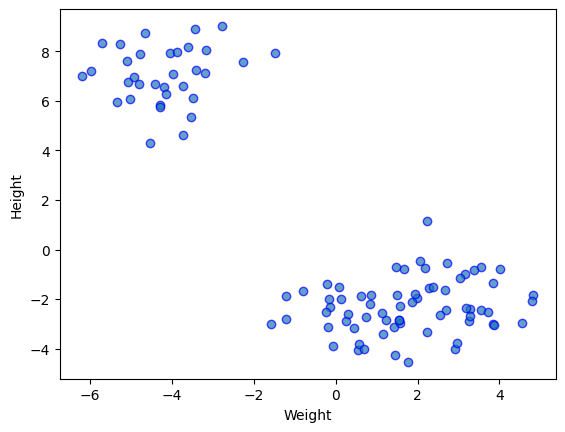

In [1]:
from DataProjection import DataProjection
from BuildAdjacency import BuildAdjacency
from Missclassification import *
from BDR_Solver import BDR_Solver
from thrC import thrC
from sklearn.datasets._samples_generator import make_circles,make_blobs
from sklearn.cluster import spectral_clustering
from matplotlib import pyplot as plt
import numpy as np

X,Y = make_blobs()
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height')
X= X.T

<function matplotlib.pyplot.show(close=None, block=None)>

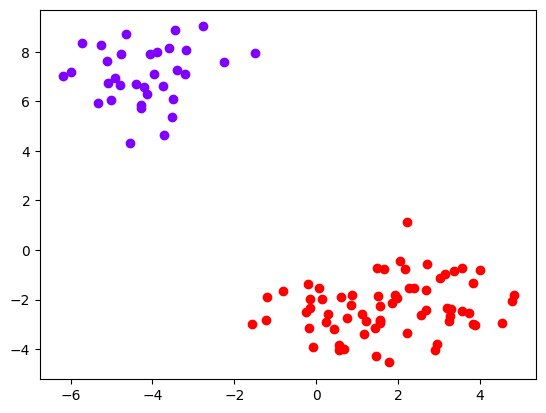

In [2]:
lmbda = 1
gamma = 10
rho = 1
nCluster = 2
X_adj = DataProjection(X)
B,Z = BDR_Solver(X_adj,nCluster,lmbda=lmbda,gamma=gamma,threshold=1e-20)
# B : 
CKSym_B,coef = BuildAdjacency(thrC(B,rho))
grps_B = spectral_clustering(CKSym_B,n_clusters=nCluster)
#missRateB = missRate(groups=grps_B,s=Y)
#print("miss rate B : ",missRateB)
# Z : 
CKSym_Z,coef = BuildAdjacency(thrC(Z,rho))
grps_Z = spectral_clustering(CKSym_Z,n_clusters = nCluster)
#missRateZ = missRate(grps_Z,s=Y)
#print("miss rate Z : ",missRateZ)

#SECTION TO ILLUSTRATE B :
colors = plt.cm.rainbow(np.linspace(0,1,nCluster))
for x in range(len(X.T)):
    plt.scatter(X[0,x],X[1,x],color=colors[grps_B[x]])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

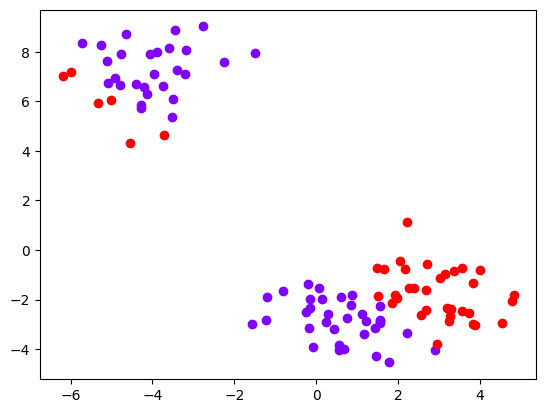

In [3]:
#SECTION TO ILLUSTRATE Z :
colors = plt.cm.rainbow(np.linspace(0,1,nCluster))
for x in range(len(X.T)):
    plt.scatter(X[0,x],X[1,x],color=colors[grps_Z[x]])
plt.show